<a href="https://colab.research.google.com/github/namiri/ML/blob/main/obj_detection_Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [7]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [8]:
# Define the ResNet model
resnet_model = models.Sequential()
resnet_model.add(layers.Input(shape=(32, 32, 3)))
resnet_model.add(tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_tensor=None, input_shape=(32, 32, 3), pooling=None, classes=10))
resnet_model.add(layers.GlobalAveragePooling2D())
resnet_model.add(layers.Dense(10, activation='softmax'))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [9]:
# Compile the model
resnet_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])


In [10]:
# Train the model
history = resnet_model.fit(train_images, train_labels, epochs=10,
                           validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 47ms/step - accuracy: 0.4118 - loss: 1.9086 - val_accuracy: 0.1423 - val_loss: 3.6059
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 29ms/step - accuracy: 0.4427 - loss: 1.7399 - val_accuracy: 0.2737 - val_loss: 21.1292
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.5119 - loss: 1.5385 - val_accuracy: 0.3590 - val_loss: 2.1101
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.5333 - loss: 1.4225 - val_accuracy: 0.6380 - val_loss: 1.0320
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6446 - loss: 1.0489 - val_accuracy: 0.5115 - val_loss: 1.6609
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.6869 - loss: 0.9091 - val_accuracy: 0.6250 - val_loss: 1.1294
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.7340 - loss: 0.7884 - val_accuracy: 0.7025 - val_loss: 0.8668
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.7744

In [11]:
# Evaluate the model
test_loss, test_acc = resnet_model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - 7ms/step - accuracy: 0.7024 - loss: 0.9694

Test accuracy: 0.7024000287055969


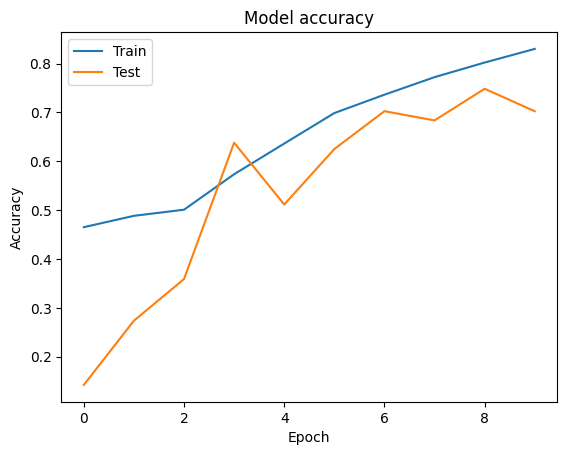

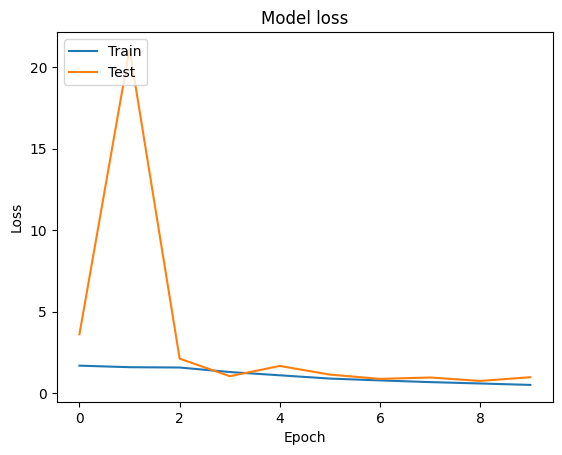

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
